#   APIs



API stands for Application Programming Interface. It is supposed to be a **well defined interface** for consuming data (in contrast to web-scraping), or, more generally, for the **interaction with a remote program** on a server. APIs aren't only generated so that you can read data; they're often designed so that you could write custom software to interact with the API. You could, for example, write your own twitter client! 

APIs are usually well documented, as the organization that provides APIs wants you to use them. 

Here are a couple of examples of sites that have documented APIs:

 * [StackExchange](https://api.stackexchange.com/docs)  
 * [Twitter](https://dev.twitter.com/rest/public)
 * [Facebook](https://developers.facebook.com/docs/graph-api)
 * [KEGG](http://www.genome.jp/kegg/rest/keggapi.html) 
 * [Google Maps](https://developers.google.com/maps/) 
 * and many many more. 
 
Most APIs require some form of authentication and have rules on what you're allowed to do and what not. Follow those rules, or you will be blocked faster than you can say `GET`. 
 
Working with an API is a lot like working with a website, but instead of a human in front of the screen, it's computers talking to each other. 

We'll be using the dominant form of APIs on the web: REST (REpresentational State Transfer). REST APIs use an [URI](https://en.wikipedia.org/wiki/Uniform_Resource_Identifier) (a Uniform Resource Identifier; URLs are one specific form of URIs) to specify what you want to do with and API.

All API methods in REST are relative to a base URL. E.g., for twitter this would be
```
https://api.twitter.com/1.1/
```

A query would look like this: 

```
https://api.twitter.com/1.1/search/tweets.json?q=%40twitterapi
```


REST APIs can return data in different forms. The most common ones are JSON and XML, and of those two, JSON is now dominant. 

JSON stands for JavaScript Object Notation, and is a pretty convenient format, as we'll see. 
 


In [2]:
import requests 
# Make a get request to get the latest position of the international space station from the opennotify api.
response = requests.get("http://api.open-notify.org/iss-now.json")

response

<Response [200]>

That looks good, we've received a response with the message "200". What does the 200 mean? It's a status code - you've probably seen the "Error 404" on the internet. 

Here are a couple of codes:

 * **200** – everything went okay, and the result has been returned (if any)
 * **301** – the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
 * **401** – the server thinks you’re not authenticated. This happens when you don’t send the right credentials to access an API (we’ll talk about authentication later).
 * **400** – the server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
 * **403** – the resource you’re trying to access is forbidden – you don’t have the right permissions to see it.
 * **404** – the resource you tried to access wasn’t found on the server.

Let's try to get a response with a wrong URL:

In [2]:
response_failed = requests.get("http://api.open-notify.org/iss")

response_failed

<Response [400]>

We used the get methods to put in a GET request. There are four different types of requests: 

![Request types](requests.png)
[Source](https://en.wikipedia.org/wiki/Representational_state_transfer)

Let's look at the payload of our previous, successful response:

In [3]:
response.content

b'{"iss_position": {"longitude": "-12.7003", "latitude": "-37.5190"}, "timestamp": 1581461225, "message": "success"}'

We can already see that this is JSON (though it is stored a `bytes` object), but we can check formally:

In [4]:
response.headers['content-type']

'application/json'

We can decode this byte object, then the JSON will be readable. 

In [5]:
response_j = response.content.decode("utf-8")
print(response_j)

{"iss_position": {"longitude": "-12.7003", "latitude": "-37.5190"}, "timestamp": 1581461225, "message": "success"}


Let's take a look at the JSON with nice formatting here:

```JSON
{
  "iss_position": {
    "latitude": -30.005751854107206, 
    "longitude": -104.20085371352678
  }, 
  "message": "success", 
  "timestamp": 1475240215
}
```

This looks a lot like a dictionary (or objects, for that matter)! We have key-value pairs. 

We can use the [json library](https://docs.python.org/3/library/json.html) to convert JSON into objects:

In [6]:
import json
response_d = json.loads(response_j)
print(type(response_d))
print(response_d)
response_d["iss_position"]

<class 'dict'>
{'iss_position': {'longitude': '-12.7003', 'latitude': '-37.5190'}, 'timestamp': 1581461225, 'message': 'success'}


{'longitude': '-12.7003', 'latitude': '-37.5190'}

Or, not surprisingly, pandas can also load a json object:

In [7]:
import pandas as pd 

df = pd.read_json(response_j)
df

,iss_position,timestamp,message
latitude,-37.5190,2020-02-11 22:47:05,success
longitude,-12.7003,2020-02-11 22:47:05,success


This isn't quite what we want - we probably want one row per timestamp and longitude and latitude as columns:

In [8]:
def flatten(response_d):
    response_flat = {}
    response_flat["latitude"] = response_d["iss_position"]["latitude"]
    response_flat["longitude"] = response_d["iss_position"]["longitude"]
    response_flat["timestamp"] = response_d["timestamp"]
    return response_flat
flatten(response_d)

{'latitude': '-37.5190', 'longitude': '-12.7003', 'timestamp': 1581461225}

That looks better. Let's get a couple of positions of the ISS over time and save it as an array:

In [9]:
import time

def pull_position():
    """Retreives the position of the ISS and returns it as a flat dictionary"""
    response = requests.get("http://api.open-notify.org/iss-now.json")
    response_j = response.content.decode("utf-8")
    response_d = json.loads(response_j)
    flat_response = flatten(response_d)
    return flat_response    

iss_position = []
    
# calls pull_position 10 times with 3 seconds break
for i in range(10):
    flat_response = pull_position()
    iss_position.append(flat_response)
    print(flat_response)
    time.sleep(3)
    
len(iss_position)

{'latitude': '-50.8303', 'longitude': '24.2895', 'timestamp': 1581461698}
{'latitude': '-50.8655', 'longitude': '24.5791', 'timestamp': 1581461701}
{'latitude': '-50.9000', 'longitude': '24.8692', 'timestamp': 1581461704}
{'latitude': '-50.9337', 'longitude': '25.1597', 'timestamp': 1581461707}
{'latitude': '-50.9667', 'longitude': '25.4507', 'timestamp': 1581461710}
{'latitude': '-50.9988', 'longitude': '25.7420', 'timestamp': 1581461713}
{'latitude': '-51.0301', 'longitude': '26.0338', 'timestamp': 1581461716}
{'latitude': '-51.0607', 'longitude': '26.3259', 'timestamp': 1581461719}
{'latitude': '-51.0904', 'longitude': '26.6184', 'timestamp': 1581461722}
{'latitude': '-51.1194', 'longitude': '26.9113', 'timestamp': 1581461725}


10

Now we can convert this into a nice dataframe:

In [10]:
iss_position_df = pd.DataFrame(iss_position)
iss_position_df['timestamp']  = pd.to_datetime(iss_position_df['timestamp'], unit="s")

iss_position_df = iss_position_df.set_index(pd.DatetimeIndex(iss_position_df['timestamp']))
iss_position_df["latitude"] = iss_position_df["latitude"].map(float)
iss_position_df["longitude"] = iss_position_df["longitude"].map(float)
iss_position_df

,latitude,longitude,timestamp
timestamp,,,
2020-02-11 22:54:58,-50.8303,24.2895,2020-02-11 22:54:58
2020-02-11 22:55:01,-50.8655,24.5791,2020-02-11 22:55:01
2020-02-11 22:55:04,-50.9000,24.8692,2020-02-11 22:55:04
2020-02-11 22:55:07,-50.9337,25.1597,2020-02-11 22:55:07
2020-02-11 22:55:10,-50.9667,25.4507,2020-02-11 22:55:10
2020-02-11 22:55:13,-50.9988,25.7420,2020-02-11 22:55:13
2020-02-11 22:55:16,-51.0301,26.0338,2020-02-11 22:55:16
2020-02-11 22:55:19,-51.0607,26.3259,2020-02-11 22:55:19
2020-02-11 22:55:22,-51.0904,26.6184,2020-02-11 22:55:22


Let's see how the ISS moves

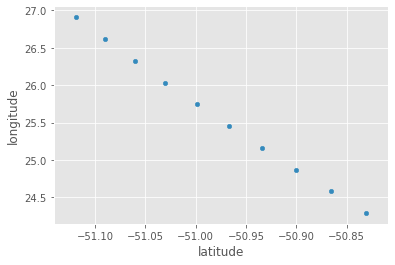

In [11]:
import matplotlib.pyplot as plt
# This next line tells jupyter to render the images inline
%matplotlib inline
plt.style.use('ggplot')
iss_position_df.plot(kind="scatter", x="latitude", y="longitude")

### Querying with Parameters

Requests can be parametrized. You can search for tweets of a specific user, for example, or [retrieve the time the ISS is over SLC](http://open-notify.org/Open-Notify-API/ISS-Pass-Times/)!

The way to query with a get request for the ISS is this:

`http://api.open-notify.org/iss-pass.json?lat=40.758701&lon=-111.876183`

We, of course, could generate that URL ourselves, but the requests library is helpful here. Since JSON is similar to dictionaries, the requests library takes dictionaries for parameters.

In [12]:
url = "http://api.open-notify.org/iss-pass.json"
coordinates = {"lat": 40.758701, "lon": -111.876183, "n":5}

r = requests.get(url, params=coordinates)
data = r.json()
data

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1581461230,
  'latitude': 40.758701,
  'longitude': -111.876183,
  'passes': 5},
 'response': [{'duration': 656, 'risetime': 1581464789},
  {'duration': 547, 'risetime': 1581470627},
  {'duration': 622, 'risetime': 1581524976},
  {'duration': 645, 'risetime': 1581530768},
  {'duration': 576, 'risetime': 1581536654}]}

In [13]:
timestamp = data["response"][0]["risetime"]
pd.to_datetime(timestamp,  unit="s")

Timestamp('2020-02-11 23:46:29')

In [5]:
 # How many Astronauts? 

url = "http://api.open-notify.org/astros.json"

r = requests.get(url)
data = r.json()
data



{'message': 'success',
 'number': 5,
 'people': [{'craft': 'ISS', 'name': 'Chris Cassidy'},
  {'craft': 'ISS', 'name': 'Anatoly Ivanishin'},
  {'craft': 'ISS', 'name': 'Ivan Vagner'},
  {'craft': 'ISS', 'name': 'Doug Hurley'},
  {'craft': 'ISS', 'name': 'Bob Behnken'}]}

## Libraries and Authentication

While we now have the skills to directly talk to an API, it's sometimes a little tedious. Popular APIs often have existing Python libraries that wrap around them. [Here](https://github.com/realpython/list-of-python-api-wrappers) is a long list of wrappers! 

Now we'll explore the Twitter API using the [twython library](https://github.com/ryanmcgrath/twython). Check out the [documentation](https://twython.readthedocs.io/en/latest/).

Unfortunately, most professional APIs will require you to authenticate and will limit you in what you can do – mostly they limit how much data you can retreive at a certain time. To run the following code, you'll have to put in your own credentials (sorry – I can't share mine). 

Install twython:
`pip install twython`

* Go to https://apps.twitter.com/ and create a new app
* Save your consumer key and consumer secret in a file `credentials.py` in the format:
```python
CONSUMER_KEY = "KEY"
CONSUMER_SECRET = "KEY"
```

But before we get started, let's check out what [a tweet looks like](https://dev.twitter.com/overview/api/tweets):

```JSON
{'contributors': None,
  'coordinates': None,
  'created_at': 'Fri Sep 30 18:37:48 +0000 2016',
  'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
  'favorite_count': 2960,
  'favorited': False,
  'geo': None,
  'id': 781926033159249920,
  'id_str': '781926033159249920',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'retweet_count': 1283,
  'retweeted': False,
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'text': "For those few people knocking me for tweeting at three o'clock in the morning, at least you know I will be there, awake, to answer the call!",
  'truncated': False,
  'user': {'contributors_enabled': False,
   'created_at': 'Wed Mar 18 13:46:38 +0000 2009',
   'default_profile': False,
   'default_profile_image': False,
   'description': '',
   'entities': {'description': {'urls': []},
    'url': {'urls': [{'display_url': 'DonaldJTrump.com',
       'expanded_url': 'http://www.DonaldJTrump.com',
       'indices': [0, 23],
       'url': 'https://t.co/mZB2hymxC9'}]}},
   'favourites_count': 39,
   'follow_request_sent': None,
   'followers_count': 11929387,
   'following': None,
   'friends_count': 41,
   'geo_enabled': True,
   'has_extended_profile': False,
   'id': 25073877,
   'id_str': '25073877',
   'is_translation_enabled': True,
   'is_translator': False,
   'lang': 'en',
   'listed_count': 39225,
   'location': 'New York, NY',
   'name': 'Donald J. Trump',
   'notifications': None,
   'profile_background_color': '6D5C18',
   'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg',
   'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg',
   'profile_background_tile': True,
   'profile_banner_url': 'https://pbs.twimg.com/profile_banners/25073877/1468988952',
   'profile_image_url': 'http://pbs.twimg.com/profile_images/1980294624/DJT_Headshot_V2_normal.jpg',
   'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1980294624/DJT_Headshot_V2_normal.jpg',
   'profile_link_color': '0D5B73',
   'profile_sidebar_border_color': 'BDDCAD',
   'profile_sidebar_fill_color': 'C5CEC0',
   'profile_text_color': '333333',
   'profile_use_background_image': True,
   'protected': False,
   'screen_name': 'realDonaldTrump',
   'statuses_count': 33344,
   'time_zone': 'Eastern Time (US & Canada)',
   'url': 'https://t.co/mZB2hymxC9',
   'utc_offset': -14400,
   'verified': True}
```


In [7]:

from twython import Twython
# credentials is a local file with your own credentials. It defines CONSUMER_KEY and CONSUMER_SECRET
# you will have to load your own credentials here.
from credentials import * 
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

Here, we have created the Twython library object and authenticated against our user.

Now let's search for a hashtag:

In [18]:
tag = "#corona"
result = twitter.search(q=tag, tweet_mode="extended")
result

{'statuses': [{'created_at': 'Wed Apr 29 05:29:20 +0000 2020',
   'id': 1255368551067762688,
   'id_str': '1255368551067762688',
   'full_text': 'RT @ashokgehlot51: Good to know, Rajasthanis in the UK are providing help to people there during #corona crisis. They are taking care of st…',
   'truncated': False,
   'display_text_range': [0, 140],
   'entities': {'hashtags': [{'text': 'corona', 'indices': [97, 104]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'ashokgehlot51',
      'name': 'Ashok Gehlot',
      'id': 385926583,
      'id_str': '385926583',
      'indices': [3, 17]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 226973184,
    'id_str': '226

The result is an array of tweets, we can look at specific text:

In [17]:
result["statuses"][0]["full_text"]


'RT @ashutosh83B: जस्टिस मार्कंडेय काटजू लिखते हैं -तब्लीग़ पर लगे आरोप झूठे और हास्यप्रद \n\n#कोरोना_वायरस #कोरोना_को_हराना_है #कोरोना_मरकज़_…'

Or print all the tweets:

In [19]:
for status in result["statuses"]:
    print(status["full_text"])
    print("----")

RT @ashokgehlot51: Good to know, Rajasthanis in the UK are providing help to people there during #corona crisis. They are taking care of st…
----
He's misguiding people about #corona as he claims that he can treat it with only coconut water N vit c fruits. 🤣🤣🤣 https://t.co/6qpDozZPBH
----
RT @madhavi_agarwal: बंगाल के हावड़ा में #corona संक्रमण के बुरे हालत हैं, Lockdown का पालन कराने पहुंची CRPF की टीम पर शांतिदूतों ने हमला…
----
RT @ashokgehlot51: Good to know, Rajasthanis in the UK are providing help to people there during #corona crisis. They are taking care of st…
----
RT @Thomas_Gutsche: Wir ahnten es.
#Corona 
https://t.co/nG7QUiDEyK
----
RT @BhoyeUttam: @Cmsoni95969411 @ISupport_Bapuji विश्व मे #COVID19 का कहर छाया हुआ है वहीं पूज्य Sant Shri Asharamji Bapu की सद्प्रेरणा से…
----
RT @CAPratikKarpe: Now @ShivSena Leader from Mumbai comes out public raising issues about quarantine centres

Questions CM @OfficeofUT @AUT…
----
RT @bhupendrachaube: The three IRS officers who were in

## Analysis of Twitter Popularity



We can search for tweets based on usernames:

In [20]:
result = twitter.search(q="@realDonaldTrump",  tweet_mode="extended")
for status in result["statuses"]:
    print(status["full_text"])
    print("----")

RT @BrandonBeckham_: @ScottPresler @realDonaldTrump @bittyandbeaus 🇺🇲 There appears to be targeting of Pro-@realDonaldTrump Conservatives f…
----
@realDonaldTrump This is an out and out LIE!
----
RT @Pismo_B: Folks, This👇is why I VOTED for Donald Trump in 2016.

And Hell Yes, I am VOTING for @realDonaldTrump in 2020!

#AmericaFirst…
----
@eugenegu @realDonaldTrump How many children have you pumped full of deadly chemicals in the name of vaccines....Murderer!!!
----
@realDonaldTrump But still if you can not impose full lock down than its become irrelevant as more and more people will be tested positive and will bring more death
----
@realDonaldTrump Moron
----
RT @realDonaldTrump: The Democrats dropped all references to God from their platform. Not good!
----
RT @RealCandaceO: This pandemic is so real and so deadly that the media has spent the last 3 days trying to convince us that @realDonaldTru…
----
RT @MrMickeyBitsko: @realDonaldTrump Without proper and more widespread testing 
.
Op

This returns all tweets that are mentioning a username. We can also explicitly get the tweets of a person. Let's download Trump's last 50 tweets. [Here](https://dev.twitter.com/rest/reference/get/statuses/user_timeline) is the relevant API documentation, [here](https://github.com/ryanmcgrath/twython/blob/master/twython/endpoints.py) are the definitions for twython.

In [21]:
#twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# count is limited to the last 3200 tweets of a user, a max of 200 per request
trump_result = twitter.get_user_timeline(screen_name="realDonaldTrump", count=50)
trump_result

[{'created_at': 'Wed Apr 29 04:23:38 +0000 2020',
  'id': 1255352014042738688,
  'id_str': '1255352014042738688',
  'text': 'The only reason the U.S. has reported one million cases of CoronaVirus is that our Testing is sooo much better than… https://t.co/fMqZ9Eah2D',
  'truncated': True,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/fMqZ9Eah2D',
     'expanded_url': 'https://twitter.com/i/web/status/1255352014042738688',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [117, 140]}]},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 25073877,
   'id_str': '25073877',
   'name': 'Donald J. Trump',
   'screen_name': 'realDonaldTrump',
   'location': 'Washington, DC',
   'descrip

Let's count the numbers for Trump's favorites and retweets.

In [22]:
trump_favorites = []
trump_retweets = []
trump_texts = []
for status in trump_result:
    print(status["text"])
    print(status["favorite_count"])
    print("----")
    trump_favorites.append(status["favorite_count"])
    trump_retweets.append(status["retweet_count"])
    trump_texts.append(status["text"])

The only reason the U.S. has reported one million cases of CoronaVirus is that our Testing is sooo much better than… https://t.co/fMqZ9Eah2D
32416
----
THANK YOU MICHAEL! @bittyandbeaus https://t.co/KVXVcdO79E
28620
----
RT @WhiteHouse: We built the greatest economy in the world—and together, we will build it again! https://t.co/57gxhVH2k2
0
----
RT @GLFOP: Thank you, President @realDonaldTrump, for your steadfast, unapologetic support of law enforcement during #COVID19. From DAY ONE…
0
----
https://t.co/shcVSYZmuY https://t.co/ispKWWF96K
70508
----
https://t.co/9YNWvhqCk7
47763
----
RT @WhiteHouse: LIVE: POTUS delivers remarks on supporting small businesses https://t.co/QdwfDq1UOk
0
----
Thank you @BlueAngels and @AFThunderbirds! #AmericaStrong https://t.co/oZyFJBT90h https://t.co/bq0VOKYsmd
44735
----
RT @TomFitton: BREAKING: Emails show Obama FBI was out to get @GenFlynn and also knew McCain leaked anti-@realDonaldTrump dossier; @Judicia…
0
----
RT @nedryun: A fifth to half of all c

Now let's do the same for Elizabeth Warren.

In [23]:
warren_results = twitter.get_user_timeline(screen_name="ewarren", count=50)
warren_results

[{'created_at': 'Wed Apr 29 03:12:15 +0000 2020',
  'id': 1255334053403856897,
  'id_str': '1255334053403856897',
  'text': "I got a note yesterday from Sarah, a nurse in Utah. She and her husband are health care workers who can't afford ti… https://t.co/0zWBrA76ZJ",
  'truncated': True,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/0zWBrA76ZJ',
     'expanded_url': 'https://twitter.com/i/web/status/1255334053403856897',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [117, 140]}]},
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 357606935,
   'id_str': '357606935',
   'name': 'Elizabeth Warren',
   'screen_name': 'ewarren',
   'location': 'Massachusetts',
   'description': 'U.S. Sena

In [24]:
warren_favorites = []
warren_retweets = []
warren_texts = []
for status in warren_results:
    print(status["text"])
    print(status["favorite_count"])
    print("----")
    warren_favorites.append(status["favorite_count"])
    warren_retweets.append(status["retweet_count"])
    warren_texts.append(status["text"])

I got a note yesterday from Sarah, a nurse in Utah. She and her husband are health care workers who can't afford ti… https://t.co/0zWBrA76ZJ
7005
----
This virus doesn’t discriminate based on immigration status—and our response shouldn’t either. 

We need to make su… https://t.co/ytI92ID7H2
538
----
RT @AOC: Now is the time to stand up for mom + pops &amp; protect them from getting wiped out by Wall Street.

That means checking mega corps f…
0
----
The Trump administration’s process for distributing medical supplies appears to be driven by politics instead of pu… https://t.co/bvfarAWPo3
4433
----
Once again: If we’re only testing people with symptoms who make it to the hospital, then we are far from understand… https://t.co/XQlitJcYzH
5074
----
Donald Trump has had an arsenal of tools at his disposal to prevent medical workers from having to make these gut-w… https://t.co/OLellcixsa
4293
----
I’m fighting for essential workers like Christina—a critical care nurse for over 30 years who’

And let's create DataFrames for both of them and explore their stats:

In [26]:
import pandas as pd
trump_stats = pd.DataFrame({
        "Trump Fav":trump_favorites,
        "Trump RT":trump_retweets,
        "Trum Text":trump_texts
    })

warren_stats = pd.DataFrame({
      "Warren Fav":warren_favorites,
      "Warren RT":warren_retweets, 
      "Warren Text":warren_texts
        })

In [27]:
trump_stats.head()

,Trump Fav,Trump RT,Trum Text
0,32416,6656,The only reason the U.S. has reported one mill...
1,28620,7006,THANK YOU MICHAEL! @bittyandbeaus https://t.co...
2,0,4965,RT @WhiteHouse: We built the greatest economy ...
3,0,3991,"RT @GLFOP: Thank you, President @realDonaldTru..."
4,70508,16938,https://t.co/shcVSYZmuY https://t.co/ispKWWF96K


In [28]:
trump_stats.describe()

,Trump Fav,Trump RT
count,50.000000,50.000000
mean,45227.420000,21645.340000
std,81506.422002,18191.102953
min,0.000000,3991.000000
25%,0.000000,7457.250000
50%,0.000000,15590.500000
75%,64821.750000,26978.000000
max,380040.000000,78659.000000


In [29]:
warren_stats.describe()

,Warren Fav,Warren RT
count,50.000000,50.000000
mean,3887.360000,990.440000
std,5974.805866,1294.603732
min,0.000000,21.000000
25%,0.000000,221.000000
50%,1559.500000,452.000000
75%,4829.750000,1237.000000
max,26104.000000,5816.000000


Now we're plotting the tweets; but we have to sort them first so that they make sense. 

In [30]:
trump_stats = trump_stats.sort_values("Trump Fav", ascending=False)
trump_stats = trump_stats.reset_index(drop=True)
trump_stats.head(30)

,Trump Fav,Trump RT,Trum Text
0,380040,78659,"FAKE NEWS, THE ENEMY OF THE PEOPLE!"
1,211905,46810,"There has never been, in the history of our Co..."
2,210401,45873,Why should the people and taxpayers of America...
3,195420,35397,"We are doing far more, and better, Testing tha..."
4,190248,30288,Many States moving to SAFELY &amp; QUICKLY reo...
5,173020,43050,Blame the Democrats for any “lateness” in your...
6,134718,26978,So true! https://t.co/fyJgDBuKzM
7,133435,24266,Texas to open businesses in phases beginning F...
8,124485,15959,I will be having a White House Press Conferenc...
9,109361,28643,Because Shifty is a crooked politician! https:...


In [31]:
trump_stats.tail(10)

,Trump Fav,Trump RT,Trum Text
40,0,6513,"RT @TheCounter: First, there is no shortage of..."
41,0,6748,"RT @WhiteHouse: As one American family, we gri..."
42,0,17605,RT @realDonaldTrump: https://t.co/12Lv2yr07h
43,0,20809,RT @Jim_Jordan: Attorney General Barr’s Memo t...
44,0,78659,"RT @realDonaldTrump: FAKE NEWS, THE ENEMY OF T..."
45,0,46810,"RT @realDonaldTrump: There has never been, in ..."
46,0,43050,RT @realDonaldTrump: Blame the Democrats for a...
47,0,26978,RT @realDonaldTrump: So true!
48,0,7683,"RT @WhiteHouse: ""We're doing everything in our..."
49,0,6743,RT @SecondLady: Wishing you a very special bir...


In [32]:
warren_stats = warren_stats.sort_values("Warren Fav", ascending=False)
warren_stats = warren_stats.reset_index(drop=True)
warren_stats.head(30)

,Warren Fav,Warren RT,Warren Text
0,26104,857,"Last year, we got to celebrate Bruce’s birthda..."
1,20248,2749,I’ll be joining @AOC live on Instagram at 2:30...
2,18160,3435,"During this crisis, the last thing we need is ..."
3,16807,5816,There is something fundamentally wrong when bi...
4,14367,3503,Reopening states too soon will come at the ris...
5,11852,2176,I was glad to talk with @AOC today about the E...
6,9307,1944,"On #SOULSaturday, I’m joining @JoeBiden and th..."
7,8214,1727,I’ve been getting a lot of questions from kids...
8,7877,1641,Donald Trump’s words matter because he is the ...
9,7005,946,"I got a note yesterday from Sarah, a nurse in ..."


In [33]:
combined = warren_stats.copy()
combined["Trump Fav"] = trump_stats["Trump Fav"]
combined["Trump RT"] = trump_stats["Trump RT"]

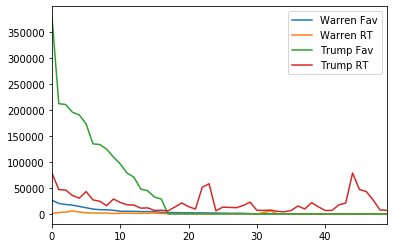

In [34]:
combined.plot()